Heigon Soldera 217638
Rafael Galib 204904

In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def MinMax(xy):
    features = []
    results = []
    newXY = []

    # Agrupa cada coordenada de um ponto em uma lista dentro de features e results
    for i in range(len(xy[0])):
        aux1 = []
        aux2 = []
        for j in range(len(xy)):
            aux1.append(xy[j][i])
            aux2.append(xy[j][i])
        features.append(aux1)
        results.append(aux2)


    # Normaliza os dados em results a partir dos dados em features
    for i in range(len(features)):
        for j in range(len(features[i])):
            results[i][j] = ((features[i][j] - min(features[i])) * 3) / (max(features[i])-min(features[i]))

    # Retorna para a configuração de lista de pontos
    for i in range(len(results)):
        for j in range(len(results[i])):
            if i == 0:
                aux = [results[i][j]]
                newXY.append(aux)
            else:
                newXY[j].append(results[i][j])
                
    return np.array(newXY)

In [3]:
with open('kick1.dat') as f:
    lines = f.readlines()
    xyz = np.array([[float(line.split()[0]),float(line.split()[1]),float(line.split()[2])] for line in lines])


    X = xyz[:,0]
    Y = xyz[:,1]
    Z = xyz[:,2]

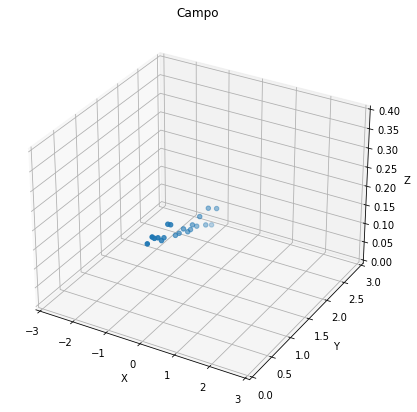

In [4]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

ax.scatter3D(X, Y, Z)
ax.set_xlim(-3, 3)
ax.set_ylim(0, 3)
ax.set_zlim(0, 0.4)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.title("Campo")
plt.show()

# Hipótese
  
## $h_{\theta}(x,y) = z = \theta_0 + \theta_1 x + \theta_2 y$

In [7]:
def h(t0,t1,t2,x,y):
    z = t0 + t1*x + t2*y
    return z

# Função de Custo 
## $J(\theta) = \frac{1}{2m} \sum^m_{i=1} (h_{\theta} - z)^2 $

# Derivadas 
  
## $\theta_{0} := \theta_{0} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times 1 $
  
## $\theta_{1} := \theta_{1} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times x $
  
## $\theta_{2} := \theta_{2} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times y $

In [14]:
t0A = 0
t1A = 0
t2A = 0
alpha = 0.1
m = len(X)

for j in range(101):

    soma = 0
    for i in range(m):
        soma += (h(t0A,t1A,t2A,X[i],Y[i]) - Z[i]) * 1
    t0N = t0A - (alpha/m) * soma

    soma = 0
    for i in range(m):
        soma += (h(t0A,t1A,t2A,X[i],Y[i]) - Z[i]) * X[i]
    t1N = t1A - (alpha/m) * soma

    soma = 0
    for i in range(m):
        soma += (h(t0A,t1A,t2A,X[i],Y[i]) - Z[i]) * Y[i]
    t2N = t2A - (alpha/m) * soma

    t0A = t0N
    t1A = t1N
    t2A = t2N
print(t0N)
print(t1N)
print(t2N)

0.031228227984843582
-0.029212205334348398
0.04252152698289937


In [16]:
newZ = []
for i in range(20):
    newZ.append(h(t0N,t1N,t2N,X[i],Y[i]))

In [27]:
listZ = []
y = Y[0]
x = X[0]
listX = []
listY = []
while y > 0:
    listZ.append(h(t0N,t1N,t2N,x,y))
    listX.append(x)
    listY.append(y)
    x -= 0.05
    y -= 0.05

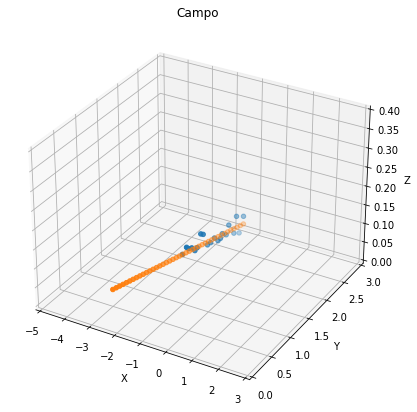

In [28]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

ax.scatter3D(X, Y, Z)
ax.scatter3D(listX,listY,listZ,'r')
ax.set_xlim(-5, 3)
ax.set_ylim(0, 3)
ax.set_zlim(0, 0.4)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.title("Campo")
plt.show()